# Capstone Project - The Battle of Neighborhoods in London

## Introduction and scope of the problem

Nowadays we are living in an exponentially globalized world where people are increasingly moving from one city to another, between different countries (or even continents) chasing their dreams or just to find a better place to live and call home. Happiness and comfort are two very important pylars in human being’s lives, existing several factors which may affect them either positive and/or negativelly. One factor is safety, a fundamental concept that sometimes is underappreciated in highly developed countries (mainly because criminality rate is decreasing) but it is essential to choose the place where we would live and mostly when we are moving to a new/ unknown place.  

London is the capital and largest city of England and United Kingdom (UK), as well as one of most important cities in western part of Europe, with a total population of around 9 million people, distributed by their 33 boroughs (including the City of London). Although it is well known as a crucial metropolis with a inumerous offer, quality of life, a diverse range of people and cultures, etc., London is also a city with a vast criminal record and therefore this variable plays an important role, or being even decisive, at the time of choosing a place when we decide to move and to settle a new life there. 

Based on this premise, the project main goal can be posed by the following question: “what is the most suitable/ safest area to live within London city?” Puting the hands on the data will help to discover the answer in order to make a recommendation for the target audience. In fact, this project is very interesting to everybody who is coming to London from abroad (or even within London area) and want to rent/ buy a new house or also for any businessman who wants to find the best area to move its company’s office or even to implement the headquarters of its start-up company.

## Data

In order to answer the question, and to achieve the objective described above, available free data is used and analised throughout the project, according to the London criminal records (e.g., number and type of crimes, evolution of criminality over time, which boroughs are the most dangerous and safest, etc.) and, at the end, the analysis of venues across different neighborhoods will also be taken into account for decision/ recommendation making.

In short, data manipulation is firstly performed using the main and additional datasets (see references below), as well as the exploratory analysis of the data for a more comprehensive interpretation through the combination of several variables of London criminal records. After choosing the most suitable borough(s), location data from Foursquare API is used to
to explore neighborhoods within given boroughs of London, retrieving the most common venue categories in each neighborhood. This is the final part of the project, the so-called Segmentation and Clustering process, where lastly consists in the grouping of the neighborhoods into clusters (applying k-means clustering algorithm) and also in the use of Folium library to visualize the neighborhoods in London and their emerging clusters.

##### Main dataset: London Crime Data between 2008-2016 (source: https://www.kaggle.com/jboysen/london-crime).

- Variables of main dataset:

    - lsoa_code (code for Lower Super Output Area in Greater London (lsoa)).
    - borough (Name of London boroughs).
    - major_category (Major categorization of crimes).
    - minor_category (Minor categorization of crimes according to major category).
    - value (Number of crimes monthly reported in given borough).
    - year (Year of reported crimes, Jan/2008 - Dez/2016).
    - month (Month of reported crimes, Jan - Dez (1-12)).
    
##### Additional dataset: List of London Boroughs (source: https://en.wikipedia.org/wiki/List_of_London_boroughs).

- Variables of additional dataset:

    - Borough
    - Inner
    - Status Local Authority
    - Political Control
    - Headquarters
    - Area
    - Population
    - Coordinates
    
This additional dataset has several variables available, however only Borough and Population were the variables to be used for this project. Although the coordinates will also be necessary for this work, the variable Coordinates of this table was discarded since they are obtained afterwards applying geocoder to retrieve them and to start the battle of neighborhoods.

For the final part of this work, a list of neighborhoods was used, regarding the selected borough, and obtained from wikipedia website (source: https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames).

#### Import Python Libraries

In [ ]:
import requests 
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt

from pylab import *

from bs4 import BeautifulSoup 

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

### Importing datasets and data preparation

#### Import main dataset of London criminal records

In [2]:
# The code was removed by Watson Studio for sharing.

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


##### Remove the elements equal to zero from value column (i.e. the crimes were reported, although any crime was really confirmed and registered)

In [3]:
# delete value = 0
df = df[df.value != 0]
df = df.reset_index(drop=True)
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
4,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


##### Detailed dataset properties

In [10]:
# Table dimension
df.shape

(3419099, 7)

In [11]:
# Table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419099 entries, 0 to 3419098
Data columns (total 7 columns):
lsoa_code         object
borough           object
major_category    object
minor_category    object
value             int64
year              int64
month             int64
dtypes: int64(3), object(4)
memory usage: 182.6+ MB


#### Importing additional dataset of list of London boroughs

In [4]:
wiki_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_link=requests.get(wiki_link).text

soup=BeautifulSoup(raw_link,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"10bc1c9a-e6b4-4bd1-819e-fea3521b1a01","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of 

##### Extract raw table into the wikipedia webpage

In [5]:
table = soup.find_all('table', {'class':'wikitable sortable'})
print(table)

[<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Ha

##### Convert the table into a dataframe

In [6]:
df_wiki = pd.read_html(str(table[0]), index_col=None, header=0)[0]
df_wiki.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [7]:
# See dimensions of this table
df_wiki.shape

(32, 10)

##### Since the dataset was imported, the information of 32 boroughs is now available to be used. However, a second table from wikipedia webpage must still be imported with a new borough (i.e., City of London)

In [8]:
df_wiki2 = pd.read_html(str(table[1]), index_col=None, header=0)[0]

df_wiki2.columns = ['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']

df_wiki2

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


##### Append this table to the main table of additional dataset

In [9]:
df_wiki = df_wiki.append(df_wiki2, ignore_index = True) 
df_wiki.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


##### Confirm the information about City of London was appended in the last row (row 32)

In [18]:
df_wiki.tail()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
28,Tower Hamlets,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
32,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


##### Rename some columns of df_wiki and check for matching boroughs

In [10]:
df_wiki = df_wiki.replace('note 2','', regex=True) 
df_wiki = df_wiki.replace('note 3','', regex=True) 
df_wiki = df_wiki.replace('note 4','', regex=True) 
df_wiki = df_wiki.replace('note 5','', regex=True) 
df_wiki = df_wiki.rename(columns={'Borough': 'borough', 'Population (2013 est)[1]': 'Population'})

In [11]:
# Check matching boroughs from main dataset and additional dataset 
set(df.borough)-set(df_wiki.borough)

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham'}

In [12]:
# Find the index of the boroughs
print("The index of first borough is",df_wiki.index[df_wiki['borough'] == 'Barking and Dagenham []'].tolist())
print("The index of second borough is",df_wiki.index[df_wiki['borough'] == 'Greenwich []'].tolist())
print("The index of third borough is",df_wiki.index[df_wiki['borough'] == 'Hammersmith and Fulham []'].tolist())

The index of first borough is []
The index of second borough is [9]
The index of third borough is [11]


In [13]:
# Replace the name of the Boroughs to match
df_wiki.iloc[0,0] = 'Barking and Dagenham'
df_wiki.iloc[9,0] = 'Greenwich'
df_wiki.iloc[11,0] = 'Hammersmith and Fulham'

In [14]:
# Check now if they match
set(df_wiki.borough) - set(df_wiki.borough)

set()

#### Merge two dataframes (main and additional datasets)

In [15]:
df_merge = pd.merge(df, df_wiki, on='borough')
df_merge.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population,Co-ordinates,Nr. in map
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18
1,E01004165,Sutton,Robbery,Personal Property,1,2008,1,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18
2,E01004142,Sutton,Burglary,Burglary in Other Buildings,3,2013,5,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18
3,E01004123,Sutton,Violence Against the Person,Wounding/GBH,2,2012,5,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18
4,E01004182,Sutton,Criminal Damage,Criminal Damage To Dwelling,1,2012,8,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18


#### Pivot the original dataframe

In [16]:
df_pivot = pd.pivot_table(df,values=['value'],
                               index=['borough'],
                               columns=['major_category'],
                               aggfunc=np.sum,fill_value=0)
df_pivot.head()

value                                          \
major_category       Burglary Criminal Damage  Drugs Fraud or Forgery   
borough                                                                 
Barking and Dagenham    18103           18888   9188              205   
Barnet                  36981           21024   9796              175   
Bexley                  14973           17244   7346              106   
Brent                   28923           20569  25978              157   
Bromley                 27135           24039   8942              196   

                                                                        \
major_category       Other Notifiable Offences Robbery Sexual Offences   
borough                                                                  
Barking and Dagenham                      2819    6105              49   
Barnet                                    2953    7374              38   
Bexley                                    1999    2338              22   
Brent                                     3711   12473              39   
Bromley                                   2637    4868              31   

                                                                     
major_category       Theft and Handling Violence Against the Person  
borough                                                              
Barking and Dagenham              50999                       43091  
Barnet                            87285                       46565  
Bexley                            40071                       30037  
Brent                             72523                       63178  
Bromley                           69742                       46759

In [17]:
# Reset index
df_pivot.reset_index(inplace = True)

In [18]:
# Generate a new column for Total crimes
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot.head(33)

borough    value                         \
major_category                         Burglary Criminal Damage  Drugs   
0                 Barking and Dagenham    18103           18888   9188   
1                               Barnet    36981           21024   9796   
2                               Bexley    14973           17244   7346   
3                                Brent    28923           20569  25978   
4                              Bromley    27135           24039   8942   
5                               Camden    27939           18482  21816   
6                       City of London       15              16     33   
7                              Croydon    33376           31218  19162   
8                               Ealing    30831           25613  18591   
9                              Enfield    30213           22487  13251   
10                           Greenwich    20966           22755  10836   
11                             Hackney    21450           17327  18144   
12              Hammersmith and Fulham    17010           14595  15492   
13                            Haringey    28213           22272  14563   
14                              Harrow    19630           12724   7122   
15                            Havering    21302           17252   8171   
16                          Hillingdon    26056           24485  11413   
17                            Hounslow    21026           21407  13722   
18                           Islington    22207           18354  16553   
19              Kensington and Chelsea    14980            9839  14573   
20                Kingston upon Thames    10131           10610   5682   
21                             Lambeth    30199           26136  25083   
22                            Lewisham    24871           24810  16825   
23                              Merton    16485           14339   6651   
24                              Newham    25356           24177  18389   
25                           Redbridge    26735           17543  15736   
26                Richmond upon Thames    16097           11722   4707   
27                           Southwark    27980           24450  27381   
28                              Sutton    13207           14474   4586   
29                       Tower Hamlets    21510           21593  23408   
30                      Waltham Forest    25565           20459  14101   
31                          Wandsworth    25533           19630   9493   
32                         Westminster    29295           20405  34031   

                                                                   \
major_category Fraud or Forgery Other Notifiable Offences Robbery   
0                           205                      2819    6105   
1                           175                      2953    7374   
2                           106                      1999    2338   
3                           157                      3711   12473   
4                           196                      2637    4868   
5                           123                      3857    9286   
6                             0                        17      24   
7                           270                      4340   12645   
8                           175                      4406    9568   
9                           132                      3293    9059   
10                          107                      3598    5430   
11                          143                      3332    8975   
12                           91                      3352    5279   
13                          207                      2971   10084   
14                           92                      1998    4242   
15                          179                      2358    3089   
16                          223                      6504    5663   
17                          183                      3963    4847   
18                           85                      3675   

In [19]:
# Rename the columns of dataframe
df_pivot.columns = ['borough','Burglary', 'Criminal Damage','Drugs','Fraud or Forgery','Other Notifiable Offences','Robbery','Sexual Offences',
                        'Theft and Handling','Violence Against the Person','Total']
df_pivot.head()

,borough,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349


In [20]:
# Merge df_pivot dataframe with df_wiki dataframe
df_pivot_merge = pd.merge(df_pivot, df_wiki, on='borough')
df_pivot_merge.head()

,borough,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population,Co-ordinates,Nr. in map
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [35]:
# Check the dataframe dimension
df_pivot_merge.shape

(33, 20)

#### Create a new dataframe for the comparison between the population number and the crimes number in 2013

In [21]:
# Retain only the crimes reported in 2013
df_2013 = df
df_2013.drop(df_2013.index[df['year'] != 2013], inplace = True)
df_2013.head()

NameError: name 'temp' is not defined

In [44]:
df_crimes = pd.merge(df_2013, df_wiki, on='borough')
df_crimes.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population,Co-ordinates,Nr. in map
0,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2,NaN,NaN,Hackney London Borough Council,Labour,"Hackney Town Hall, Mare Street",7.36,257379,51°32′42″N 0°03′19″W﻿ / ﻿51.5450°N 0.0553°W,9
1,E01001798,Hackney,Violence Against the Person,Common Assault,4,2013,12,NaN,NaN,Hackney London Borough Council,Labour,"Hackney Town Hall, Mare Street",7.36,257379,51°32′42″N 0°03′19″W﻿ / ﻿51.5450°N 0.0553°W,9
2,E01001763,Hackney,Robbery,Personal Property,1,2013,11,NaN,NaN,Hackney London Borough Council,Labour,"Hackney Town Hall, Mare Street",7.36,257379,51°32′42″N 0°03′19″W﻿ / ﻿51.5450°N 0.0553°W,9
3,E01001783,Hackney,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2013,5,NaN,NaN,Hackney London Borough Council,Labour,"Hackney Town Hall, Mare Street",7.36,257379,51°32′42″N 0°03′19″W﻿ / ﻿51.5450°N 0.0553°W,9
4,E01001828,Hackney,Theft and Handling,Other Theft,2,2013,4,NaN,NaN,Hackney London Borough Council,Labour,"Hackney Town Hall, Mare Street",7.36,257379,51°32′42″N 0°03′19″W﻿ / ﻿51.5450°N 0.0553°W,9


In [45]:
df_crimes = df_crimes.loc[ : , ['borough', 'value', 'Population'] ]
df_crimes.head()

,borough,value,Population
0,Hackney,1,257379
1,Hackney,4,257379
2,Hackney,1,257379
3,Hackney,1,257379
4,Hackney,2,257379


## Methodology

The methodology for the development of this project was three-folded: 

    1) the exploratory data analysis, 
    2) the segmentation of neighborhoods and 
    3) the clustering neighborhoods.
    
Before the first method being applied, the data needed to be scrapped and manipulated to obtain the structured format and generate the dataframes. Regarding the main dataset, the rows with variable “value” equal to zero needed to be removed from the dataframe, i.e., the crimes were reported in the given boroughs, however they were classified as zero since they probably did not trully happened and therefore these rows were discarded from the original dataset. Then, the merge of both datasets was done, grouping the rows by boroughs.

##### 1) Exploratory Data Analysis

The exploratory analysis of the data was an important section of this work because this type of analysis is very useful for a more statistical comprehensive interpretation through the combination of several variables of London criminal records. In this section, this interpretation took into account the number and type of crimes comitted in the boroughs of London, the evolution of criminality over time, the comparison of crimes between boroughs, etc. Different visualization tools were used such as line plots, scatter plot and histograms to understand and to determine the safest borough.

##### 2) Segmenting Neighborhoods of the safest borough in London

After choosing the most suitable/ safest borough in London, a new dataframe was created with the list of 15 neighborhoods. At this point, the geopy library was used to get the values of geographical coordinates (latitude and longitude) associated to each neighborhood. Then, location data from Foursquare API was used to explore neighborhoods within the selected borough, retrieving the most common venue categories in each neighborhood. This part of the project is the so-called Segmentation of Neighborhoods, where the 10 most common venues with a radius of 750 meters, around each neighborhood coordinates center, were retrieved. Finally, the folium library was also used to visualize the location of neighborhoods in the maps of London’s borough.

##### 3) Clustering Neighborhoods of the safest borough in London

The final section of the methodology describes the clustering of neighborhoods, consisting in grouping the neighborhoods into clusters. For this, firstly an one hot encoder (source: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) was applied to perform the “binarization” of each category, i.e. the top 10 most common venues associated to each neighborhood. Then, and before applying the clustering algorithm, the several rows were grouped by neighborhood and the mean of the frequency of venues was taken. The K-means clustering algorithm was then applied to generate the several clusters of neighborhoods, using lastly the folium library to visualize the neighborhoods in London and their emerging clusters. Before the decision/ recommendation making of most suitable neighborhood, the analysis of each cluster and respective most common venues was performed.

## Results

### Exploratory Data Analysis

#### Descriptive Statistics of Major Crimes Category

In [46]:
# Descriptive Statistics
df_pivot.describe()

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,22857.363636,19119.333333,14265.606061,161.363636,3222.696970,7844.636364,38.575758,80662.454545,47214.575758,195386.606061
std,7452.366846,5942.903618,7544.259564,81.603775,1362.107294,4677.643075,15.139002,45155.624776,17226.165191,79148.057551
min,15.000000,16.000000,33.000000,0.000000,17.000000,24.000000,0.000000,561.000000,114.000000,780.000000
25%,18103.000000,17244.000000,8942.000000,106.000000,2358.000000,4744.000000,27.000000,52609.000000,33968.000000,149447.000000
50%,24871.000000,20405.000000,14101.000000,157.000000,3293.000000,7688.000000,40.000000,77940.000000,50943.000000,203879.000000
75%,27980.000000,22755.000000,18389.000000,207.000000,3963.000000,10084.000000,47.000000,92523.000000,59993.000000,228613.000000
max,36981.000000,31218.000000,34031.000000,323.000000,6504.000000,18408.000000,71.000000,277617.000000,72726.000000,455028.000000


##### Total Crimes per Borough (2008 - 2016)

In [22]:
df['value'].groupby([df['borough']]).sum()

borough
Barking and Dagenham      149447
Barnet                    212191
Bexley                    114136
Brent                     227551
Bromley                   184349
Camden                    275147
City of London               780
Croydon                   260294
Ealing                    251562
Enfield                   193880
Greenwich                 181568
Hackney                   217119
Hammersmith and Fulham    185259
Haringey                  213272
Harrow                    116848
Havering                  138947
Hillingdon                209680
Hounslow                  186772
Islington                 230286
Kensington and Chelsea    171981
Kingston upon Thames       89306
Lambeth                   292178
Lewisham                  215137
Merton                    115654
Newham                    262024
Redbridge                 183562
Richmond upon Thames       96771
Southwark                 278809
Sutton                    100987
Tower Hamlets             228613
Wa

##### Total Crimes per Type - Major Category (2008 - 2016)

In [48]:
df['value'].groupby([df['major_category']]).sum()

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64

##### Total Crimes per Type - Minor Category (2008 - 2016)

In [49]:
df['value'].groupby([df['minor_category']]).sum()

minor_category
Assault with Injury                       451001
Burglary in Other Buildings               263011
Burglary in a Dwelling                    491282
Business Property                          21295
Common Assault                            413690
Counted per Victim                          3840
Criminal Damage To Dwelling               154116
Criminal Damage To Motor Vehicle          265463
Criminal Damage To Other Building          66003
Drug Trafficking                           35819
Going Equipped                              5530
Handling Stolen Goods                      16100
Harassment                                458124
Motor Vehicle Interference & Tampering     56224
Murder                                       949
Offensive Weapon                           37983
Other Criminal Damage                     145356
Other Drugs                                 2998
Other Fraud & Forgery                       1485
Other Notifiable                          100819
Other

##### Total Crimes per Year (2008 - 2016)

In [50]:
df['value'].groupby([df['year']]).sum()

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

##### Total Crimes per Month (2008 - 2016)

In [51]:
df['value'].groupby([df['month']]).sum()

month
1     530247
2     500537
3     551795
4     520648
5     552704
6     549041
7     563076
8     532784
9     522377
10    558252
11    549671
12    516626
Name: value, dtype: int64

In [23]:
# Import matplotlib
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') 
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


In [24]:
# Sort total crimes in descending order
df_pivot_merge.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_merge_top5 = df_pivot_merge.head() 
df_merge_top5

,borough,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population,Co-ordinates,Nr. in map
32,Westminster,29295,20405,34031,273,6148,15752,59,277617,71448,455028,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
21,Lambeth,30199,26136,25083,137,4520,18408,70,114899,72726,292178,NaN,NaN,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,6
27,Southwark,27980,24450,27381,321,4696,16153,40,109432,68356,278809,NaN,NaN,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,7
5,Camden,27939,18482,21816,123,3857,9286,36,140596,53012,275147,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
24,Newham,25356,24177,18389,323,4456,16913,43,106146,66221,262024,[],NaN,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,27


#### Histogram Visualization of Top 5 London Boroughs with the highest number of crimes (2008-2016)

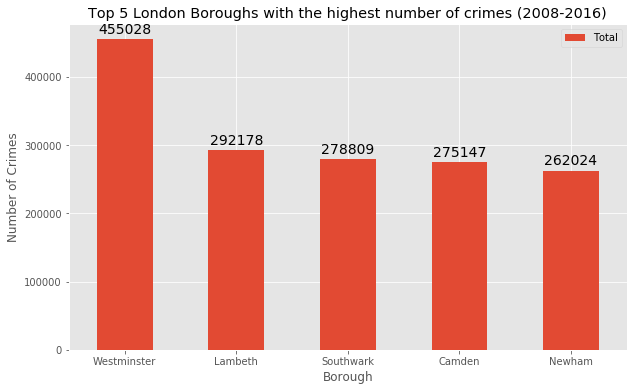

In [25]:
df_hist1 = df_merge_top5[['borough','Total']]

df_hist1.set_index('borough',inplace = True)

ax = df_hist1.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Top 5 London Boroughs with the highest number of crimes (2008-2016)') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [58]:
# Sort total crimes in ascending order
df_pivot_merge.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_merge_down5 = df_pivot_merge.head() 
df_merge_down5

,borough,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population,Co-ordinates,Nr. in map
6,City of London,15,16,33,0,17,24,0,561,114,780,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1
20,Kingston upon Thames,10131,10610,5682,65,1332,1702,18,38226,21540,89306,NaN,Royal,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,16
26,Richmond upon Thames,16097,11722,4707,37,1420,1590,26,40858,20314,96771,NaN,NaN,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,15
28,Sutton,13207,14474,4586,57,1393,2308,20,39533,25409,100987,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23


#### Histogram Visualization of Top 5 London Boroughs with the lowest number of crimes (2008-2016)

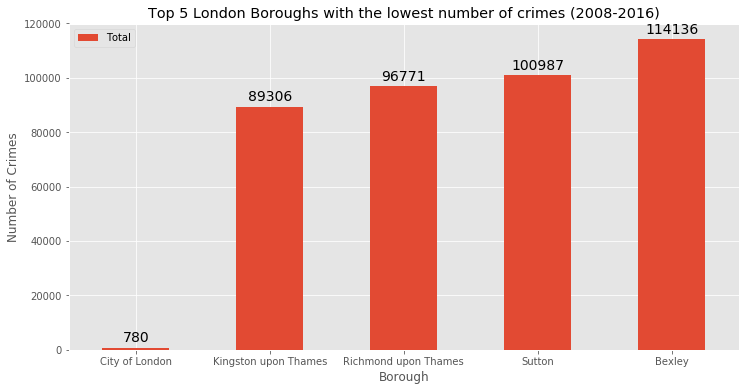

In [59]:
df_hist2 = df_merge_down5[['borough','Total']]

df_hist2.set_index('borough',inplace = True)

ax = df_hist2.plot(kind='bar', figsize=(12, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Top 5 London Boroughs with the lowest number of crimes (2008-2016)') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [60]:
# filter by borough 1 and year
borough1_2008 = df.loc[(df['borough'] == 'Kingston upon Thames') & (df['year'] == 2008) , ['value']]
borough1_2009 = df.loc[(df['borough'] == 'Kingston upon Thames') & (df['year'] == 2009) , ['value']]
borough1_2010 = df.loc[(df['borough'] == 'Kingston upon Thames') & (df['year'] == 2010) , ['value']]
borough1_2011 = df.loc[(df['borough'] == 'Kingston upon Thames') & (df['year'] == 2011) , ['value']]
borough1_2012 = df.loc[(df['borough'] == 'Kingston upon Thames') & (df['year'] == 2012) , ['value']]
borough1_2013 = df.loc[(df['borough'] == 'Kingston upon Thames') & (df['year'] == 2013) , ['value']]
borough1_2014 = df.loc[(df['borough'] == 'Kingston upon Thames') & (df['year'] == 2014) , ['value']]
borough1_2015 = df.loc[(df['borough'] == 'Kingston upon Thames') & (df['year'] == 2015) , ['value']]
borough1_2016 = df.loc[(df['borough'] == 'Kingston upon Thames') & (df['year'] == 2016) , ['value']]

# Sum up the total of crimes in borough 1 over the recorded years
total_borough1_2008 = borough1_2008['value'].sum()
total_borough1_2009 = borough1_2009['value'].sum()
total_borough1_2010 = borough1_2010['value'].sum()
total_borough1_2011 = borough1_2011['value'].sum()
total_borough1_2012 = borough1_2012['value'].sum()
total_borough1_2013 = borough1_2013['value'].sum()
total_borough1_2014 = borough1_2014['value'].sum()
total_borough1_2015 = borough1_2015['value'].sum()
total_borough1_2016 = borough1_2016['value'].sum()

In [61]:
# filter by borough 2 and year
borough2_2008 = df.loc[(df['borough'] == 'Richmond upon Thames') & (df['year'] == 2008) , ['value']]
borough2_2009 = df.loc[(df['borough'] == 'Richmond upon Thames') & (df['year'] == 2009) , ['value']]
borough2_2010 = df.loc[(df['borough'] == 'Richmond upon Thames') & (df['year'] == 2010) , ['value']]
borough2_2011 = df.loc[(df['borough'] == 'Richmond upon Thames') & (df['year'] == 2011) , ['value']]
borough2_2012 = df.loc[(df['borough'] == 'Richmond upon Thames') & (df['year'] == 2012) , ['value']]
borough2_2013 = df.loc[(df['borough'] == 'Richmond upon Thames') & (df['year'] == 2013) , ['value']]
borough2_2014 = df.loc[(df['borough'] == 'Richmond upon Thames') & (df['year'] == 2014) , ['value']]
borough2_2015 = df.loc[(df['borough'] == 'Richmond upon Thames') & (df['year'] == 2015) , ['value']]
borough2_2016 = df.loc[(df['borough'] == 'Richmond upon Thames') & (df['year'] == 2016) , ['value']]

# Sum up the total of crimes in borough 2 over the recorded years
total_borough2_2008 = borough2_2008['value'].sum()
total_borough2_2009 = borough2_2009['value'].sum()
total_borough2_2010 = borough2_2010['value'].sum()
total_borough2_2011 = borough2_2011['value'].sum()
total_borough2_2012 = borough2_2012['value'].sum()
total_borough2_2013 = borough2_2013['value'].sum()
total_borough2_2014 = borough2_2014['value'].sum()
total_borough2_2015 = borough2_2015['value'].sum()
total_borough2_2016 = borough2_2016['value'].sum()

In [63]:
# Create dataframe
total = {'2008':[total_borough1_2008, total_borough2_2008], 
         '2009':[total_borough1_2009, total_borough2_2009],
        '2010':[total_borough1_2010, total_borough2_2010],
        '2011':[total_borough1_2011, total_borough2_2011],
        '2012':[total_borough1_2012, total_borough2_2012],
        '2013':[total_borough1_2013, total_borough2_2013],
        '2014':[total_borough1_2014, total_borough2_2014],
        '2015':[total_borough1_2015, total_borough2_2015],
        '2016':[total_borough1_2016, total_borough2_2016]}

totals = pd.DataFrame(total, columns=['2008', '2009','2010','2011','2012','2013','2014','2015','2016'],index = None)
totals

,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,10661,10163,10171,10155,9956,9191,9288,9738,9983
1,11106,10618,10601,10896,11168,10439,10456,10413,11074


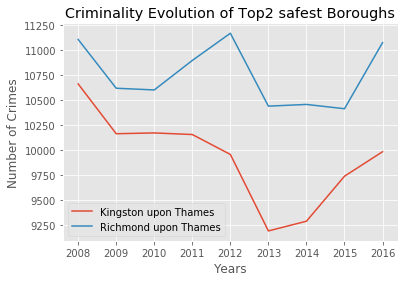

In [64]:
# Plot for Criminality
years = list(map(str,range(2008,2017)))
totals_borough1 = [total_borough1_2008,total_borough1_2009,total_borough1_2010,total_borough1_2011,total_borough1_2012,total_borough1_2013,total_borough1_2014,total_borough1_2015,total_borough1_2016]
totals_borough2 = [total_borough2_2008,total_borough2_2009,total_borough2_2010,total_borough2_2011,total_borough2_2012,total_borough2_2013,total_borough2_2014,total_borough2_2015,total_borough2_2016]
plot(years, totals_borough1)
plot(years, totals_borough2)

xlabel('Years')
ylabel('Number of Crimes')
title('Criminality Evolution of Top2 safest Boroughs')
plt.legend(['Kingston upon Thames', 'Richmond upon Thames'], loc=3)
grid(True)

show()

In [68]:
# Evolution of 2 major_crimes per year
crime1_2008 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['year'] == 2008) , ['value']]
crime1_2009 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['year'] == 2009) , ['value']]
crime1_2010 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['year'] == 2010) , ['value']]
crime1_2011 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['year'] == 2011) , ['value']]
crime1_2012 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['year'] == 2012) , ['value']]
crime1_2013 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['year'] == 2013) , ['value']]
crime1_2014 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['year'] == 2014) , ['value']]
crime1_2015 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['year'] == 2015) , ['value']]
crime1_2016 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['year'] == 2016) , ['value']]

total_crime1_2008 = crime1_2008['value'].sum()
total_crime1_2009 = crime1_2009['value'].sum()
total_crime1_2010 = crime1_2010['value'].sum()
total_crime1_2011 = crime1_2011['value'].sum()
total_crime1_2012 = crime1_2012['value'].sum()
total_crime1_2013 = crime1_2013['value'].sum()
total_crime1_2014 = crime1_2014['value'].sum()
total_crime1_2015 = crime1_2015['value'].sum()
total_crime1_2016 = crime1_2016['value'].sum()

In [69]:
# Evolution of 2 major_crimes per year
crime2_2008 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['year'] == 2008) , ['value']]
crime2_2009 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['year'] == 2009) , ['value']]
crime2_2010 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['year'] == 2010) , ['value']]
crime2_2011 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['year'] == 2011) , ['value']]
crime2_2012 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['year'] == 2012) , ['value']]
crime2_2013 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['year'] == 2013) , ['value']]
crime2_2014 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['year'] == 2014) , ['value']]
crime2_2015 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['year'] == 2015) , ['value']]
crime2_2016 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['year'] == 2016) , ['value']]

total_crime2_2008 = crime2_2008['value'].sum()
total_crime2_2009 = crime2_2009['value'].sum()
total_crime2_2010 = crime2_2010['value'].sum()
total_crime2_2011 = crime2_2011['value'].sum()
total_crime2_2012 = crime2_2012['value'].sum()
total_crime2_2013 = crime2_2013['value'].sum()
total_crime2_2014 = crime2_2014['value'].sum()
total_crime2_2015 = crime2_2015['value'].sum()
total_crime2_2016 = crime2_2016['value'].sum()

In [70]:
# Create dataframe
total_crimes = {'2008':[total_crime1_2008, total_crime2_2008], 
         '2009':[total_crime1_2009, total_crime2_2009],
        '2010':[total_crime1_2010, total_crime2_2010],
        '2011':[total_crime1_2011, total_crime2_2011],
        '2012':[total_crime1_2012, total_crime2_2012],
        '2013':[total_crime1_2013, total_crime2_2013],
        '2014':[total_crime1_2014, total_crime2_2014],
        '2015':[total_crime1_2015, total_crime2_2015],
        '2016':[total_crime1_2016, total_crime2_2016]}

totals_crimes = pd.DataFrame(total_crimes, columns=['2008', '2009','2010','2011','2012','2013','2014','2015','2016'],index = None)
totals_crimes

,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,283692,279492,290924,309292,334054,306372,279880,284022,294133
1,159844,160777,157894,146901,150014,146181,185349,218740,232381


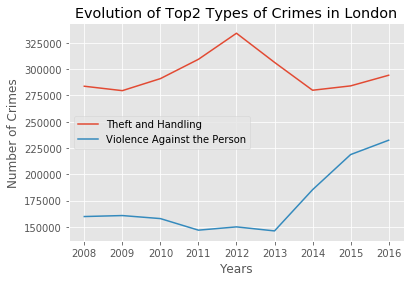

In [71]:
# Plot for Criminality
years = list(map(str,range(2008,2017)))
totals_crime1 = [total_crime1_2008,total_crime1_2009,total_crime1_2010,total_crime1_2011,total_crime1_2012,total_crime1_2013,total_crime1_2014,total_crime1_2015,total_crime1_2016]
totals_crime2 = [total_crime2_2008,total_crime2_2009,total_crime2_2010,total_crime2_2011,total_crime2_2012,total_crime2_2013,total_crime2_2014,total_crime2_2015,total_crime2_2016]
plot(years, totals_crime1)
plot(years, totals_crime2)

xlabel('Years')
ylabel('Number of Crimes')
title('Evolution of Top2 Types of Crimes in London')
plt.legend(['Theft and Handling', 'Violence Against the Person'], loc=6)
grid(True)

show()

In [72]:
# Evolution of 2 major_crimes per month
crime1_m1 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 1) , ['value']]
crime1_m2 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 2) , ['value']]
crime1_m3 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 3) , ['value']]
crime1_m4 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 4) , ['value']]
crime1_m5 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 5) , ['value']]
crime1_m6 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 6) , ['value']]
crime1_m7 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 7) , ['value']]
crime1_m8 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 8) , ['value']]
crime1_m9 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 9) , ['value']]
crime1_m10 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 10) , ['value']]
crime1_m11 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 11) , ['value']]
crime1_m12 = df.loc[(df['major_category'] == 'Theft and Handling') & (df['month'] == 12) , ['value']]

total_crime1_m1 = crime1_m1['value'].sum()
total_crime1_m2 = crime1_m2['value'].sum()
total_crime1_m3 = crime1_m3['value'].sum()
total_crime1_m4 = crime1_m4['value'].sum()
total_crime1_m5 = crime1_m5['value'].sum()
total_crime1_m6 = crime1_m6['value'].sum()
total_crime1_m7 = crime1_m7['value'].sum()
total_crime1_m8 = crime1_m8['value'].sum()
total_crime1_m9 = crime1_m9['value'].sum()
total_crime1_m10 = crime1_m10['value'].sum()
total_crime1_m11 = crime1_m11['value'].sum()
total_crime1_m12 = crime1_m12['value'].sum()

In [73]:
# Evolution of 2 major_crimes per month
crime2_m1 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 1) , ['value']]
crime2_m2 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 2) , ['value']]
crime2_m3 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 3) , ['value']]
crime2_m4 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 4) , ['value']]
crime2_m5 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 5) , ['value']]
crime2_m6 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 6) , ['value']]
crime2_m7 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 7) , ['value']]
crime2_m8 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 8) , ['value']]
crime2_m9 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 9) , ['value']]
crime2_m10 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 10) , ['value']]
crime2_m11 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 11) , ['value']]
crime2_m12 = df.loc[(df['major_category'] == 'Violence Against the Person') & (df['month'] == 12) , ['value']]

total_crime2_m1 = crime2_m1['value'].sum()
total_crime2_m2 = crime2_m2['value'].sum()
total_crime2_m3 = crime2_m3['value'].sum()
total_crime2_m4 = crime2_m4['value'].sum()
total_crime2_m5 = crime2_m5['value'].sum()
total_crime2_m6 = crime2_m6['value'].sum()
total_crime2_m7 = crime2_m7['value'].sum()
total_crime2_m8 = crime2_m8['value'].sum()
total_crime2_m9 = crime2_m9['value'].sum()
total_crime2_m10 = crime2_m10['value'].sum()
total_crime2_m11 = crime2_m11['value'].sum()
total_crime2_m12 = crime2_m12['value'].sum()

In [74]:
# Create dataframe
total_crimes_months = {'January':[total_crime1_m1, total_crime2_m1], 
         'February':[total_crime1_m2, total_crime2_m2],
        'March':[total_crime1_m3, total_crime2_m3],
        'April':[total_crime1_m4, total_crime2_m4],
        'May':[total_crime1_m5, total_crime2_m5],
        'June':[total_crime1_m6, total_crime2_m6],
        'July':[total_crime1_m7, total_crime2_m7],
        'August':[total_crime1_m8, total_crime2_m8],
        'September':[total_crime1_m9, total_crime2_m9],
         'October':[total_crime1_m10, total_crime2_m10],
         'November':[total_crime1_m11, total_crime2_m11],
         'December':[total_crime1_m12, total_crime2_m12]}

totals_crimes_months = pd.DataFrame(total_crimes_months, columns=['January', 'February','March','April','May','June','July','August','September','October','November','December'],index = None)
totals_crimes_months

,January,February,March,April,May,June,July,August,September,October,November,December
0,213302,203462,228385,217257,229036,227727,231580,216657,216974,235086,228828,213567
1,120073,114006,128949,123534,136794,138071,143535,132051,129580,135109,130361,126018


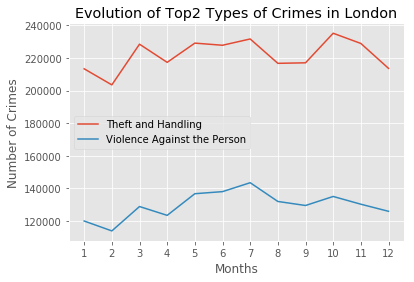

In [75]:
# Plot for Criminality
months = list(map(str,range(1,13)))
totals_crime1_months = [total_crime1_m1,total_crime1_m2,total_crime1_m3,total_crime1_m4,total_crime1_m5,total_crime1_m6,total_crime1_m7,total_crime1_m8,total_crime1_m9,total_crime1_m10,total_crime1_m11,total_crime1_m12]
totals_crime2_months = [total_crime2_m1,total_crime2_m2,total_crime2_m3,total_crime2_m4,total_crime2_m5,total_crime2_m6,total_crime2_m7,total_crime2_m8,total_crime2_m9,total_crime2_m10,total_crime2_m11,total_crime2_m12]
plot(months, totals_crime1_months)
plot(months, totals_crime2_months)

xlabel('Months')
ylabel('Number of Crimes')
title('Evolution of Top2 Types of Crimes in London')
plt.legend(['Theft and Handling', 'Violence Against the Person'], loc=6)
grid(True)

show()

In [76]:
# Select crimes number by borough (2013)
df_crimes_value = df_crimes['value'].groupby([df_crimes['borough']]).sum()
df_crimes_value

borough
Barking and Dagenham      15759
Barnet                    22510
Bexley                    11552
Brent                     23759
Bromley                   18945
Camden                    28435
City of London              110
Croydon                   27444
Ealing                    25917
Enfield                   21574
Greenwich                 18948
Hackney                   25633
Hammersmith and Fulham    18605
Haringey                  20705
Harrow                    11914
Havering                  15089
Hillingdon                20248
Hounslow                  19749
Islington                 23784
Kensington and Chelsea    17702
Kingston upon Thames       9191
Lambeth                   31868
Lewisham                  22074
Merton                    11595
Newham                    27577
Redbridge                 19793
Richmond upon Thames      10439
Southwark                 31128
Sutton                    10057
Tower Hamlets             26258
Waltham Forest            21903


In [77]:
# Select population number by borough (2013)
df_crimes_pop = df_crimes['Population'].groupby([df_crimes['borough']]).unique()
df_crimes_pop

borough
Barking and Dagenham      [194352]
Barnet                    [369088]
Bexley                    [236687]
Brent                     [317264]
Bromley                   [317899]
Camden                    [229719]
City of London              [7000]
Croydon                   [372752]
Ealing                    [342494]
Enfield                   [320524]
Greenwich                 [264008]
Hackney                   [257379]
Hammersmith and Fulham    [178685]
Haringey                  [263386]
Harrow                    [243372]
Havering                  [242080]
Hillingdon                [286806]
Hounslow                  [262407]
Islington                 [215667]
Kensington and Chelsea    [155594]
Kingston upon Thames      [166793]
Lambeth                   [314242]
Lewisham                  [286180]
Merton                    [203223]
Newham                    [318227]
Redbridge                 [288272]
Richmond upon Thames      [191365]
Southwark                 [298464]
Sutton      

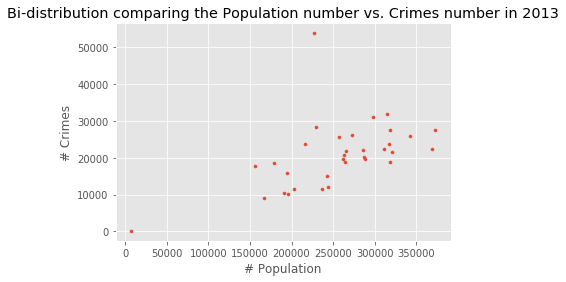

In [78]:
# Create the scatter plot
area = np.pi*3
plt.scatter(df_crimes_pop, df_crimes_value, s=area, alpha=1)
plt.title('Bi-distribution comparing the Population number vs. Crimes number in 2013')
plt.xlabel('# Population')
plt.ylabel('# Crimes')
plt.show()

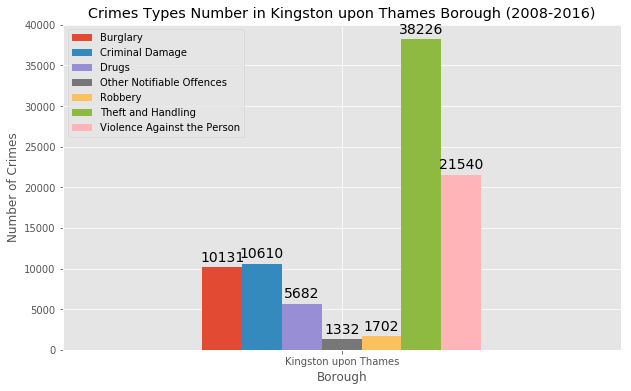

In [79]:
df_down5 =  df_merge_down5[df_merge_down5['borough'] == 'Kingston upon Thames']

df_down5_borough1 = df_down5[['borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]


df_down5_borough1.set_index('borough',inplace = True)

ax = df_down5_borough1.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Crimes Types Number in Kingston upon Thames Borough (2008-2016)') # add title to the plot

# Creating a function to display the number of crimes per type

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

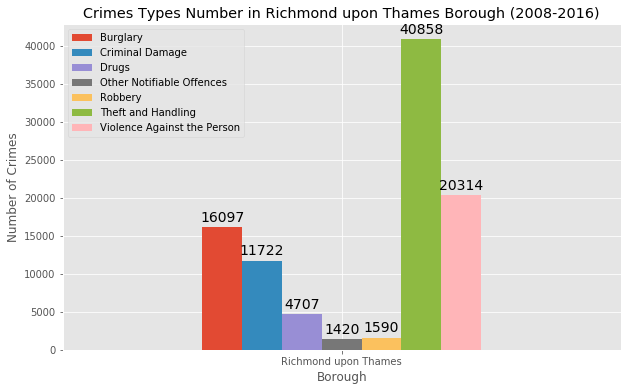

In [80]:
df_down5 =  df_merge_down5[df_merge_down5['borough'] == 'Richmond upon Thames']

df_down5_borough2 = df_down5[['borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]


df_down5_borough2.set_index('borough',inplace = True)

ax = df_down5_borough2.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Crimes Types Number in Richmond upon Thames Borough (2008-2016)') # add title to the plot

# Creating a function to display the number of crimes per type

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### Segmenting Neighborhoods of safest borough in London

#### Create a new dataframe for the selected safest borough in London (Kingston upon Thames)

In [193]:
# Create the arrays for neighborhoods and borough
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

Neighborhoods = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
df_neighborhoods = pd.DataFrame(data=Neighborhoods, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

#### Find the coordinates (latitude and longitude) of every neighborhood of Kingston upon Thames borough

In [194]:
# Find the coordinates of each neighborhood
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
    
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


#### Create the final dataframe along with the coordinates of each neighborhood

In [195]:
neighborhoods = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
df_neighborhoods = pd.DataFrame(data=neighborhoods, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

df_neighborhoods

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


#### Get coordinates of Borough center (Berrylands, london, UK)

In [196]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


#### Map visualization - Kingston upon Thames borough and respective neighborhoods

In [197]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, borough, neighborhood in zip(df_neighborhoods['Latitude'], df_neighborhoods['Longitude'], df_neighborhoods['Borough'], df_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

#### Foursquare API

In [198]:
CLIENT_ID='XS1RHHWNWIGK1SIRUUANOHJSPTNHBWVTONTFFNNXP4ZEC2EC'
CLIENT_SECRET='0EIVHREB1Z1GEDUJA1WE1TXMKTU0GOCUATWNREODZUZV4HAQ'

VERSION='20180604'
LIMIT=30

print('Your credentials:')
print('CLIENT_ID:' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID:XS1RHHWNWIGK1SIRUUANOHJSPTNHBWVTONTFFNNXP4ZEC2EC
CLIENT_SECRET:0EIVHREB1Z1GEDUJA1WE1TXMKTU0GOCUATWNREODZUZV4HAQ


#### Create function to extract venues from every neighborhood with the radius to explore of 750 meters

In [199]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [200]:
neighborhood_venues = getNearbyVenues(names=df_neighborhoods['Neighborhood'],
                                   latitudes=df_neighborhoods['Latitude'],
                                   longitudes=df_neighborhoods['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


#### Visualize the obtained dataframe of neighborhoods and venues information 

In [201]:
print(neighborhood_venues.shape)
neighborhood_venues

(260, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,The Berrylands Pub,51.398169,-0.280365,Pub
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Berrylands,51.393781,-0.284802,The Walnut,51.398349,-0.280055,Coffee Shop
4,Berrylands,51.393781,-0.284802,Platform 1,51.398865,-0.280978,Platform
5,Berrylands,51.393781,-0.284802,Elmbridge Fields,51.395832,-0.276117,Park
6,Berrylands,51.393781,-0.284802,Berrylands Railway Station (BRS),51.399081,-0.280913,Train Station
7,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
8,Canbury,51.417499,-0.305553,The Boater's Inn,51.418546,-0.305915,Pub
9,Canbury,51.417499,-0.305553,The Grey Horse,51.414192,-0.300759,Pub


#### Count the number of features per neighborhood

In [202]:
neighborhood_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,7,7,7,7,7,7
Canbury,30,30,30,30,30,30
Chessington,7,7,7,7,7,7
Coombe,5,5,5,5,5,5
Hook,11,11,11,11,11,11
Kingston Vale,8,8,8,8,8,8
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,10,10,10,10,10,10
Motspur Park,9,9,9,9,9,9


In [203]:
print('There are {} uniques categories.'.format(len(neighborhood_venues['Venue Category'].unique())))

There are 78 uniques categories.


### Clustering Neighborhoods of safest borough in London

##### One hot coding - data binarization into categories 

Source: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [204]:
neighborhood_OneHotCoding = pd.get_dummies(neighborhood_venues[['Venue Category']], prefix="", prefix_sep="")

neighborhood_OneHotCoding['Neighborhood'] = neighborhood_venues['Neighborhood'] 

fixed_columns = [neighborhood_OneHotCoding.columns[-1]] + list(neighborhood_OneHotCoding.columns[:-1])
neighborhood_OneHotCoding = neighborhood_OneHotCoding[fixed_columns]

neighborhood_OneHotCoding.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Bistro,Bookstore,Bowling Alley,...,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Train Station,Turkish Restaurant,Used Auto Dealership
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Grouping dataframe rows by neighborhood and take the mean of the frequency of venues of each neighborhood

In [205]:
neighborhood_grouped = neighborhood_OneHotCoding.groupby('Neighborhood').mean().reset_index()
neighborhood_grouped

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Bistro,Bookstore,Bowling Alley,...,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Train Station,Turkish Restaurant,Used Auto Dealership
0,Berrylands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.000000
1,Canbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.00,...,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.0,0.000000,0.033333,0.000000
2,Chessington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,0.000000,0.000000
3,Coombe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Hook,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,0.000000
5,Kingston Vale,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,Kingston upon Thames,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.00,...,0.066667,0.000000,0.000000,0.000000,0.033333,0.033333,0.0,0.000000,0.000000,0.000000
7,Malden Rushett,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.4,0.000000,0.000000,0.000000
8,Motspur Park,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
9,New Malden,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.00,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.033333


In [206]:
#Check dimension
neighborhood_grouped.shape

(15, 79)

#### Display the Top5 most common venues for each neighborhood (according to the mean of the frequency of venues)

In [207]:
number_top_venues = 5

for hood in neighborhood_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = neighborhood_grouped[neighborhood_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(number_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0  Gym / Fitness Center  0.14
1              Bus Stop  0.14
2              Platform  0.14
3           Coffee Shop  0.14
4                  Park  0.14


----Canbury----
                venue  freq
0                 Pub  0.10
1         Coffee Shop  0.10
2                Café  0.10
3  Italian Restaurant  0.07
4               Hotel  0.07


----Chessington----
                  venue  freq
0         Train Station  0.29
1  Fast Food Restaurant  0.14
2           Golf Course  0.14
3     Convenience Store  0.14
4              Platform  0.14


----Coombe----
                   venue  freq
0            Golf Course   0.4
1                  Hotel   0.2
2                    Spa   0.2
3                 Garden   0.2
4  Outdoors & Recreation   0.0


----Hook----
               venue  freq
0               Park  0.09
1     Breakfast Spot  0.09
2  Fish & Chips Shop  0.09
3  Indian Restaurant  0.09
4           Platform  0.09


----Kingston Vale----
         

#### Sorting the venues in descending order

In [208]:
def return_most_common_venues(row, number_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:number_top_venues]

#### Create the dataframe of venues and display the top10 most common venues for each neighborhood

In [209]:
number_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(number_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

sorted_neighborhoods_venues = pd.DataFrame(columns=columns)
sorted_neighborhoods_venues['Neighborhood'] = neighborhood_grouped['Neighborhood']

for ind in np.arange(neighborhood_grouped.shape[0]):
    sorted_neighborhoods_venues.iloc[ind, 1:] = return_most_common_venues(neighborhood_grouped.iloc[ind, :], number_top_venues)

sorted_neighborhoods_venues.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Pub,Bus Stop,Coffee Shop,Park,Platform,Gym / Fitness Center,Train Station,Farmers Market,Department Store,Discount Store
1,Canbury,Café,Coffee Shop,Pub,Hotel,Italian Restaurant,Supermarket,Plaza,Turkish Restaurant,Fish & Chips Shop,Indian Restaurant
2,Chessington,Train Station,Golf Course,Breakfast Spot,Convenience Store,Fast Food Restaurant,Platform,Garden,Furniture / Home Store,Fried Chicken Joint,French Restaurant
3,Coombe,Golf Course,Hotel,Garden,Spa,Food,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant
4,Hook,Breakfast Spot,Indian Restaurant,Convenience Store,Park,Fast Food Restaurant,Fish & Chips Shop,Supermarket,Platform,Bakery,Grocery Store


### K-means clustering algorithm with 5 clusters pre-defined 

In [210]:
from sklearn.cluster import KMeans

kclusters = 5

neighborhoods_grouped_clustering = neighborhood_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighborhoods_grouped_clustering)

kmeans.labels_[0:14]

array([0, 2, 0, 1, 2, 3, 2, 4, 3, 2, 2, 3, 2, 2], dtype=int32)

#### Display the final dataframe with neighborhoods (and borough), coordinates, cluster number and top10 most common venues for every neighborhood

In [211]:
sorted_neighborhoods_venues.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_merged = df_neighborhoods

neighborhoods_merged = neighborhoods_merged.join(sorted_neighborhoods_venues.set_index('Neighborhood'), on='Neighborhood')

neighborhoods_merged

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,0,Pub,Bus Stop,Coffee Shop,Park,Platform,Gym / Fitness Center,Train Station,Farmers Market,Department Store,Discount Store
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2,Café,Coffee Shop,Pub,Hotel,Italian Restaurant,Supermarket,Plaza,Turkish Restaurant,Fish & Chips Shop,Indian Restaurant
2,Chessington,Kingston upon Thames,51.358336,-0.298622,0,Train Station,Golf Course,Breakfast Spot,Convenience Store,Fast Food Restaurant,Platform,Garden,Furniture / Home Store,Fried Chicken Joint,French Restaurant
3,Coombe,Kingston upon Thames,51.419450,-0.265398,1,Golf Course,Hotel,Garden,Spa,Food,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant
4,Hook,Kingston upon Thames,51.367898,-0.307145,2,Breakfast Spot,Indian Restaurant,Convenience Store,Park,Fast Food Restaurant,Fish & Chips Shop,Supermarket,Platform,Bakery,Grocery Store
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,2,Café,Coffee Shop,Pub,Burger Joint,Sushi Restaurant,Mexican Restaurant,Department Store,Cosmetics Shop,Clothing Store,Portuguese Restaurant
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,3,Coffee Shop,Stables,Outdoors & Recreation,Sandwich Place,Soccer Field,Bus Stop,Grocery Store,Bar,Bistro,Food Truck
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,4,Theme Park Ride / Attraction,Pub,Restaurant,Garden Center,Hotel,Grocery Store,Bar,Food Truck,Donut Shop,Electronics Store
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,3,Gym,Tennis Court,Park,Soccer Field,Bus Stop,Japanese Restaurant,Steakhouse,Bakery,Grocery Store,Furniture / Home Store
9,New Malden,Kingston upon Thames,51.405335,-0.263407,2,Korean Restaurant,Supermarket,Indian Restaurant,Fast Food Restaurant,Clothing Store,Café,Used Auto Dealership,Karaoke Bar,Department Store,Gastropub


In [212]:
neighborhoods_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              15 non-null object
Borough                   15 non-null object
Latitude                  15 non-null float64
Longitude                 15 non-null float64
Cluster Labels            15 non-null int32
1st Most Common Venue     15 non-null object
2nd Most Common Venue     15 non-null object
3rd Most Common Venue     15 non-null object
4th Most Common Venue     15 non-null object
5th Most Common Venue     15 non-null object
6th Most Common Venue     15 non-null object
7th Most Common Venue     15 non-null object
8th Most Common Venue     15 non-null object
9th Most Common Venue     15 non-null object
10th Most Common Venue    15 non-null object
dtypes: float64(2), int32(1), object(12)
memory usage: 1.8+ KB


In [213]:
neighborhoods_merged.dropna(inplace = True)

In [214]:
neighborhoods_merged.shape

(15, 15)

In [215]:
neighborhoods_merged['Cluster Labels'] = neighborhoods_merged['Cluster Labels'].astype(int)
neighborhoods_merged['Cluster Labels']

0     0
1     2
2     0
3     1
4     2
5     2
6     3
7     4
8     3
9     2
10    2
11    3
12    2
13    2
14    3
Name: Cluster Labels, dtype: int64

In [133]:
neighborhoods_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 15 columns):
Neighborhood              13 non-null object
Borough                   13 non-null object
Latitude                  13 non-null float64
Longitude                 13 non-null float64
Cluster Labels            13 non-null int64
1st Most Common Venue     13 non-null object
2nd Most Common Venue     13 non-null object
3rd Most Common Venue     13 non-null object
4th Most Common Venue     13 non-null object
5th Most Common Venue     13 non-null object
6th Most Common Venue     13 non-null object
7th Most Common Venue     13 non-null object
8th Most Common Venue     13 non-null object
9th Most Common Venue     13 non-null object
10th Most Common Venue    13 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 1.6+ KB


#### Visualization of map with the clustering neighborhoods

In [216]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_merged['Latitude'], neighborhoods_merged['Longitude'], neighborhoods_merged['Neighborhood'], neighborhoods_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

### Analysis of each output cluster of neighborhoods

#### Cluster 2

In [217]:
neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2,Café,Coffee Shop,Pub,Hotel,Italian Restaurant,Supermarket,Plaza,Turkish Restaurant,Fish & Chips Shop,Indian Restaurant
4,Hook,Kingston upon Thames,51.367898,-0.307145,2,Breakfast Spot,Indian Restaurant,Convenience Store,Park,Fast Food Restaurant,Fish & Chips Shop,Supermarket,Platform,Bakery,Grocery Store
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,2,Café,Coffee Shop,Pub,Burger Joint,Sushi Restaurant,Mexican Restaurant,Department Store,Cosmetics Shop,Clothing Store,Portuguese Restaurant
9,New Malden,Kingston upon Thames,51.405335,-0.263407,2,Korean Restaurant,Supermarket,Indian Restaurant,Fast Food Restaurant,Clothing Store,Café,Used Auto Dealership,Karaoke Bar,Department Store,Gastropub
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,2,Italian Restaurant,Gastropub,Indian Restaurant,Pub,Fried Chicken Joint,Gym / Fitness Center,Japanese Restaurant,Pharmacy,Pizza Place,Coffee Shop
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,2,Coffee Shop,Pub,Indian Restaurant,Restaurant,Gastropub,French Restaurant,Golf Course,Grocery Store,Gym / Fitness Center,Fish & Chips Shop
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,2,Coffee Shop,Pub,Grocery Store,Restaurant,French Restaurant,Fish & Chips Shop,Indian Restaurant,Italian Restaurant,Farmers Market,Deli / Bodega


#### Cluster 0

In [218]:
neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,0,Pub,Bus Stop,Coffee Shop,Park,Platform,Gym / Fitness Center,Train Station,Farmers Market,Department Store,Discount Store
2,Chessington,Kingston upon Thames,51.358336,-0.298622,0,Train Station,Golf Course,Breakfast Spot,Convenience Store,Fast Food Restaurant,Platform,Garden,Furniture / Home Store,Fried Chicken Joint,French Restaurant


#### Cluster 1

In [219]:
neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Coombe,Kingston upon Thames,51.41945,-0.265398,1,Golf Course,Hotel,Garden,Spa,Food,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant


#### Cluster 3

In [220]:
neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,3,Coffee Shop,Stables,Outdoors & Recreation,Sandwich Place,Soccer Field,Bus Stop,Grocery Store,Bar,Bistro,Food Truck
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,3,Gym,Tennis Court,Park,Soccer Field,Bus Stop,Japanese Restaurant,Steakhouse,Bakery,Grocery Store,Furniture / Home Store
11,Old Malden,Kingston upon Thames,51.382484,-0.259090,3,Grocery Store,Gym / Fitness Center,Japanese Restaurant,Bakery,Steakhouse,Train Station,Gastropub,Food,Discount Store,Donut Shop
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,3,Grocery Store,Soccer Field,Restaurant,Coffee Shop,Italian Restaurant,Pizza Place,Discount Store,Garden Center,Sandwich Place,Café


#### Cluster 4

In [221]:
neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,4,Theme Park Ride / Attraction,Pub,Restaurant,Garden Center,Hotel,Grocery Store,Bar,Food Truck,Donut Shop,Electronics Store


## Discussion

Keeping the clustering k-value equal to 5 and the exploration radius of 750 meters, the following list of common venues, corresponding to each cluster, are the following:

#### Cluster 0:
    •	Pub
    •	Train Station
    •	Bus Stop
    •	Coffee Shop
    •	Golf Course

#### Cluster 1:
    •	Golf Course
    •	Hotel
    •	Garden
    •	Spa
    •	Food

#### Cluster 2:
    •	Café
    •	Breakfast Spot
    •	Coffee Shop
    •	Supermarket
    •	Restaurants (Korean, Italian, Indian)

#### Cluster 3:
    •	Coffee Shop
    •	Gym/ Fitness Center
    •	Grocery Store
    •	Tennis Court
    •	Soccer Field

#### Cluster 4:
    •	Theme Park Ride/ Attraction
    •	Pub
    •	Restaurant
    •	Garden Center
    •	Hotel

After analysing the clusters, the neighborhood recommendation would be Berrylands. Independently if the interested audience is just a citizen who wants to find an house or a businessman to open a new office, neighborhood Berrylands would be the most suitable area where just a walk of a few minutes we can find social venues as pubs or cofee shops, or public transport points as train station and bus stops, or either if one is interested in taking a golf course is also very closed to the neighbohood center. 
Moving a bit further, i.e. 750 meters or more, food shops restaurants, grocery, breakfast spots) and supermarkt restaurant stores can also be found as wells as gym places, cafes and sport and leisure zones (e.g. soccer, tenis, garden). 

#### Common Venues in Berrylands neighborhood (max <=750 meters)
    •	Pub
    •	Train Station
    •	Bus Stop
    •	Coffee Shop
    •	Golf Course

#### Common Venues from adjacent Clusters 2 and 3 (max > 750 meters)
    •	Café
    •	Gym/ Fitness Center
    •	Breakfast Spot
    •	Supermarket
    •	Grocery Store
    •	Restaurants (Korean, Italian, Indian)
    •	Tennis Court
    •	Soccer Field
    •	Golf Course
    •	Hotel/ Spa
    •	Garden

## Conclusion

In this project the exploratory analysis of London crime data was done to better understand how criminality components evolved during last years and to find the safest borough (Kingston upon Thames).

Segmenting and clustering of neighborhoods belonging to Kingston upon Thames borough was achieved using Foursquare API and K-means algorithm, allowing to explore and retrieve the most common venues around each neighborhood and cluster them based on venues similarity; After analysing the several clusters and respective venues, the final recomendation to everybody who is interested to find a new house, or a new work office for a start-up company, would be Berrylands neighborhood. 

As future work of this project, the extension of this method to other London boroughs would be valuable but also the incorporation of property/ offices costs to complement this work, since only topics of safety and common venues were taken in consideration.